In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from bs4 import BeautifulSoup

## Extracting data:
We have the list of problems as a JSON file, from where we extract the id, title, # submitted, # accepted, and difficulty of each problem

In [159]:
url = "https://leetcode.com/api/problems/all/"
data = requests.get(url).json()

In [161]:
difficulty_map = {1: 'Easy', 2: 'Medium', 3: 'Hard'}
questions = []
for question in data['stat_status_pairs']:
    qid = question['stat']['question_id']
    title = question['stat']['question__title']
    submitted = question['stat']['total_submitted']
    accepted = question['stat']['total_acs']
    difficulty_label = question['difficulty']['level']
    difficulty = difficulty_map[difficulty_label]
    questions.append((qid, title, submitted, accepted, difficulty, difficulty_label))

We create a dataframe and calculate the acceptance percentage of each problem

In [162]:
df = pd.DataFrame(questions, columns=['qid', 'title', 'submitted', 'accepted', 'difficulty', 'difficulty_label']).sort_values(by=['qid']).reset_index(drop=True)
df['acceptance'] = np.round(100*df['accepted']/df['submitted'], 2)

We can decide to exclude problems whose number of submissions is below a certain threshold, if we judge that these are not relevant

In [163]:
THRESHOLD = 30000
df = df[df['submitted'] >= THRESHOLD]

In [164]:
df.head(10)

,qid,title,submitted,accepted,difficulty,difficulty_label,acceptance
0,1,Two Sum,17206525,8449961,Easy,1,49.11
1,2,Add Two Numbers,8261068,3296021,Medium,2,39.90
2,3,Longest Substring Without Repeating Characters,12093840,4088582,Medium,2,33.81
3,4,Median of Two Sorted Arrays,4803537,1701480,Hard,3,35.42
4,5,Longest Palindromic Substring,6834605,2215254,Medium,2,32.41
5,6,Zigzag Conversion,2064625,893553,Medium,2,43.28
6,7,Reverse Integer,8704384,2374253,Medium,2,27.28
7,8,String to Integer (atoi),6973492,1159373,Medium,2,16.63
8,9,Palindrome Number,5132528,2721436,Easy,1,53.02
9,10,Regular Expression Matching,2713389,765670,Hard,3,28.22


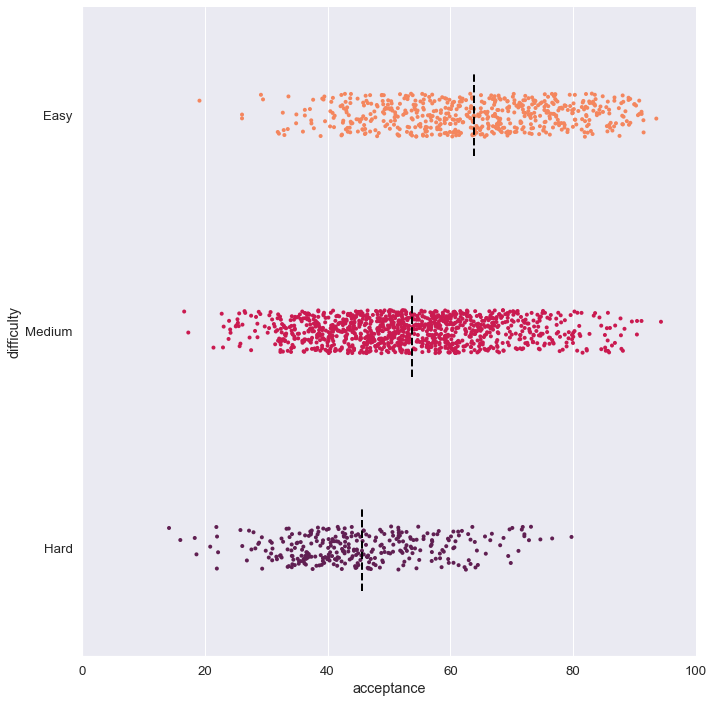

In [165]:
sns.set(font_scale=1.2)
sns.catplot(data=df, x='acceptance', y='difficulty', palette='rocket_r', s=4, height=10).set(xlim=(0, 100))
plt.axvline(x=np.nanmean(df[df['difficulty'] == 'Easy']['acceptance']), ymin=0.77, ymax=0.9, color='black', linestyle='--', linewidth=2, zorder=float('inf'))
plt.axvline(x=np.nanmean(df[df['difficulty'] == 'Medium']['acceptance']), ymin=0.43, ymax=0.56, color='black', linestyle='--', linewidth=2, zorder=float('inf'))
plt.axvline(x=np.nanmean(df[df['difficulty'] == 'Hard']['acceptance']), ymin=0.1, ymax=0.23, color='black', linestyle='--', linewidth=2, zorder=float('inf'))

In [166]:
# Easy question with lowest acceptance
easy_questions = df[df['difficulty'] == 'Easy']
easy_questions[easy_questions['acceptance'] == easy_questions['acceptance'].min()]

,qid,title,submitted,accepted,difficulty,difficulty_label,acceptance
2434,2532,Remove Letter To Equalize Frequency,103150,19722,Easy,1,19.12


In [167]:
# Hard question with highest acceptance
hard_questions = df[df['difficulty'] == 'Hard']
hard_questions[hard_questions['acceptance'] == hard_questions['acceptance'].max()]

,qid,title,submitted,accepted,difficulty,difficulty_label,acceptance
982,1022,Unique Paths III,165168,131655,Hard,3,79.71


In [170]:
# Correlation between acceptance and difficulty:
df['acceptance'].corr(df['difficulty_label'])

-0.40648373357447426

We can notice that a higher difficulty has a negative impact on acceptance but that is not as strong as we would imagine, we still have "easy" problems with low acceptance and "hard" problems with high acceptance.
We can decide to study these outliers more in-detail to see if they need to be relabeled into another difficulty.